In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)

<font size="6">**Retrieve audio**</font>

In [25]:
x, sr = librosa.load('simple-loop.wav') #x is auidio time series and sr is sampling rate

In [26]:
print (sr)

22050


In [27]:
ipd.Audio(x, rate=sr)

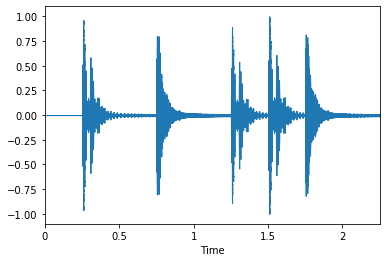

In [28]:
#display of audio signal:
librosa.display.waveplot(x, sr=sr)

In [29]:
X = librosa.stft(x)

In [30]:
Xmag = librosa.amplitude_to_db(X)

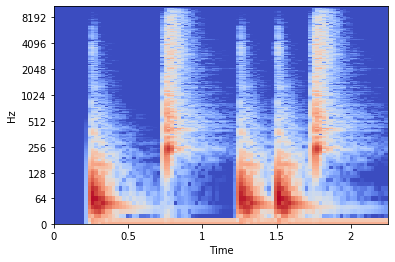

In [31]:
# Play with the parameters, including x_axis and y_axis
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')

<font size="6">**Detect Onsets**</font>

In [32]:
onset_frames = librosa.onset.onset_detect(x, sr=sr)
print (onset_frames)

[12 33 55 66 76]


In [33]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
print (onset_times)

[0.27863946 0.7662585  1.27709751 1.53251701 1.76471655]


In [34]:
onset_samples = librosa.frames_to_samples(onset_frames)
print (onset_samples)

[ 6144 16896 28160 33792 38912]


In [36]:
# Use the `length` parameter so the click track is the same length as the original signal
clicks = librosa.clicks(times=onset_times, length=len(x))

In [37]:
# Play the click track "added to" the original signal
ipd.Audio(x+clicks, rate=sr)